# Simple Moving Average Strategy

[*********************100%***********************]  1 of 1 completed


Ticker,BX,SMA_s,SMA_l,position,Return_perc,Strategy
Datetime,,,,,,
2025-01-02 14:30:00+00:00,172.645004,NaN,NaN,-100,NaN,NaN
2025-01-02 15:30:00+00:00,173.800003,NaN,NaN,-100,6.667743e-05,-6.667743e-05
2025-01-02 16:30:00+00:00,172.759995,NaN,NaN,-100,-6.001914e-05,6.001914e-05
2025-01-02 17:30:00+00:00,171.755005,NaN,NaN,-100,-5.834245e-05,5.834245e-05
2025-01-02 18:30:00+00:00,172.970001,NaN,NaN,-100,7.049105e-05,-7.049105e-05
...,...,...,...,...,...,...
2025-12-09 16:30:00+00:00,156.274994,149.915845,145.057157,100,-7.039642e-07,-7.039642e-07
2025-12-09 17:30:00+00:00,156.710007,150.129387,145.081582,100,2.779770e-05,2.779770e-05
2025-12-09 18:30:00+00:00,156.710007,150.364587,145.105832,100,0.000000e+00,0.000000e+00


Ticker
Strategy       1.358219
Return_perc    0.998985
dtype: float64

Ticker
Strategy       0.001497
Return_perc    0.001497
dtype: float64

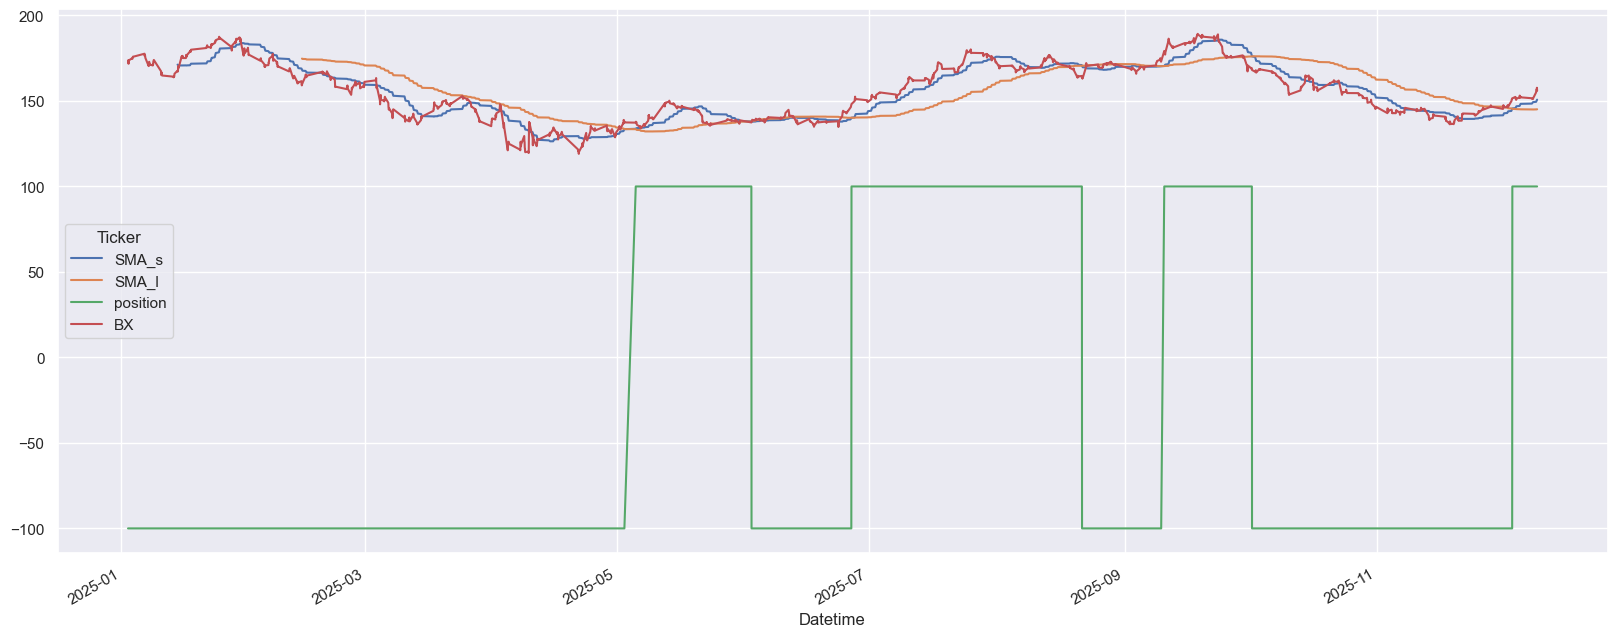

In [158]:
def strategy_sim(stock,start,end,sma_s,sma_l):
    df=yf.download(stock,start=start,end=end,interval='1h')['Close']
    df['SMA_s'] = df[stock].rolling(50).mean()
    df['SMA_l'] = df[stock].rolling(200).mean()
    df['position'] = np.where(df['SMA_s'] > (df['SMA_l']), 100, -100)
    df['Return_perc'] = np.log(df[stock] / df[stock].shift(1))/100
    df['Strategy'] = df['Return_perc'] * df['position']
    return_rst=df[['Strategy', 'Return_perc']].sum().apply(np.exp)
    df['Strategy']=df['Strategy']/100
    risk_rst=df[['Strategy','Return_perc']].std()*np.sqrt(252)
    df[['SMA_s','SMA_l','position',stock]].plot(figsize=(20,8))
    display(df)
    display(return_rst)
    display(risk_rst)


strategy_sim('BX','2025-01-01','2025-12-10',20, 100)